In [1]:
import keras,pandas as pd,os
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import Callback, EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD,Adamax,RMSprop,Adam,Nadam

In [2]:

S_1=pd.read_csv('Siover1_rf_top10_mimic_data.csv')


data_shape = S_1.shape

Siov1_x=S_1.iloc[:,1:data_shape[1]]
Siov1_y=S_1['si1m']

print(Siov1_x.shape[1])
print(Siov1_y.shape)
print(Siov1_x.shape)

10
(231253,)
(231253, 10)


In [3]:

from sklearn.model_selection import train_test_split
from utils.dataloader import normalized


In [4]:
Siov1_x.shape

(231253, 10)

In [5]:
S_3_test=pd.read_csv('Siover1_rf_top10_mimic_data_test.csv')
S_3_train=pd.read_csv('Siover1_rf_top10_mimic_data_train.csv')


In [8]:
S_3_test.shape


(57812, 11)

In [9]:
S_3_train.shape

(173441, 11)

In [10]:
test_x = S_3_test.iloc[:,1:data_shape[0]]
test_x.shape

(57812, 10)

In [11]:
train_x = S_3_train.iloc[:,1:data_shape[0]]
train_x.shape

(173441, 10)

In [12]:
test_y=S_3_test['si1m']
train_y=S_3_train['si1m']

In [13]:
test_y

0        1
1        1
2        1
3        1
4        1
        ..
57807    0
57808    0
57809    0
57810    0
57811    0
Name: si1m, Length: 57812, dtype: int64

In [14]:


print(train_y.shape)
print(train_x.shape)
print(test_y.shape)
print(test_x.shape)
print(sum(test_y))

(173441,)
(173441, 10)
(57812,)
(57812, 10)
7014


In [15]:
def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

In [17]:
from utils.model import best_model


Epoch 1/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4957 - accuracy: 0.8488 - val_loss: 0.4560 - val_accuracy: 0.9051
Epoch 2/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4777 - accuracy: 0.8533 - val_loss: 0.4403 - val_accuracy: 0.9079
Epoch 3/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4703 - accuracy: 0.8549 - val_loss: 0.4337 - val_accuracy: 0.9108
Epoch 4/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4658 - accuracy: 0.8562 - val_loss: 0.4277 - val_accuracy: 0.9114
Epoch 5/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4639 - accuracy: 0.8561 - val_loss: 0.4250 - val_accuracy: 0.9121
Epoch 6/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4613 - accuracy: 0.8560 - val_loss: 0.4231 - val_accuracy: 0.9114
Epoch 7/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4605 - accuracy: 0.8566 - val_loss: 0.4208 - val_accuracy: 0.9138

Epoch 58/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4360 - accuracy: 0.8602 - val_loss: 0.3953 - val_accuracy: 0.9135
Epoch 59/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4364 - accuracy: 0.8604 - val_loss: 0.3925 - val_accuracy: 0.9177
Epoch 60/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4357 - accuracy: 0.8611 - val_loss: 0.3930 - val_accuracy: 0.9173
Epoch 61/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4352 - accuracy: 0.8605 - val_loss: 0.3927 - val_accuracy: 0.9178
Epoch 62/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4349 - accuracy: 0.8606 - val_loss: 0.3906 - val_accuracy: 0.9195
Epoch 63/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4343 - accuracy: 0.8610 - val_loss: 0.3928 - val_accuracy: 0.9189
Epoch 64/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4354 - accuracy: 0.8607 - val_loss: 0.3923 - val_accuracy:

Epoch 115/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4288 - accuracy: 0.8619 - val_loss: 0.3849 - val_accuracy: 0.9208
Epoch 116/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4296 - accuracy: 0.8618 - val_loss: 0.3842 - val_accuracy: 0.9217
Epoch 117/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4284 - accuracy: 0.8612 - val_loss: 0.3835 - val_accuracy: 0.9195
Epoch 118/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4300 - accuracy: 0.8609 - val_loss: 0.3839 - val_accuracy: 0.9205
Epoch 119/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4285 - accuracy: 0.8618 - val_loss: 0.3835 - val_accuracy: 0.9223
Epoch 120/300
781/781 [==============================] - 1s 1ms/step - loss: 0.4297 - accuracy: 0.8607 - val_loss: 0.3849 - val_accuracy: 0.9207
Epoch 00120: early stopping


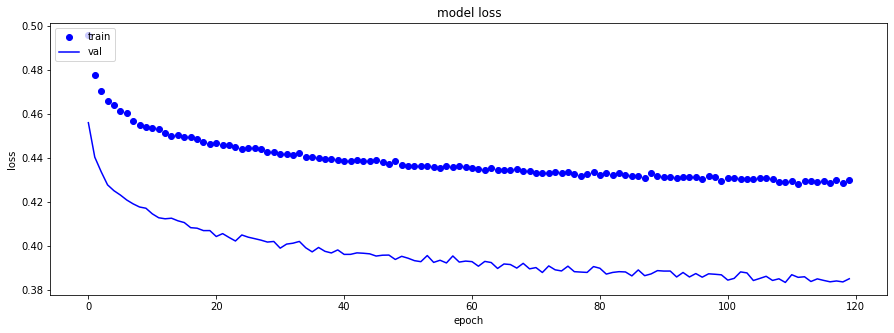

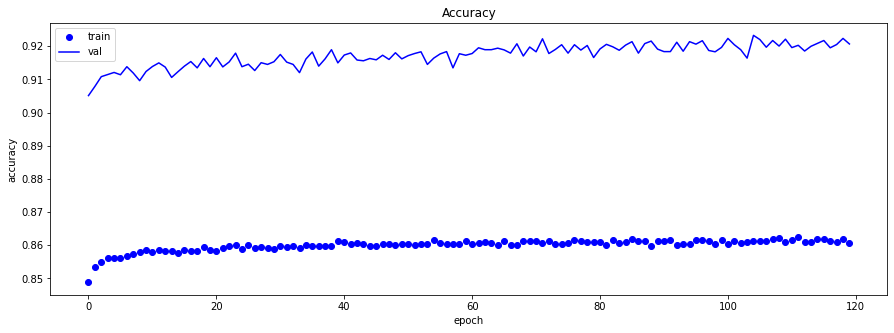

In [21]:
model_best = best_model(train_x, test_x, train_y, test_y,input_shape=10, 
                        batch=200,epoch=300,lr=0.001,decay=0.1,momentum=0.8,af='relu',
                        units_L=3,dropout=0.1 ,units_num=10,warm_up=0)


In [22]:
yhat_probs_train = model_best.predict(train_x, verbose=0)
yhat_probs_test = model_best.predict(test_x, verbose=0)

In [23]:
_,accuracy_tr = model_best.evaluate(train_x, train_y,verbose=0)
_,accuracy_te = model_best.evaluate(test_x, test_y,verbose=0)

In [24]:
accuracy_tr

0.878921389579773

In [25]:
accuracy_te

0.8794195055961609

In [26]:
auc_tr=roc_auc_score(train_y, yhat_probs_train)
auc_te=roc_auc_score(test_y, yhat_probs_test)


In [27]:

yhat_probs_test = model_best.predict(test_x, verbose=0)

In [28]:
auc_tr

0.8201639038912784

In [29]:
auc_te

0.8209831833860304

In [31]:
r0=pd.DataFrame([accuracy_tr, accuracy_te,auc_tr,auc_te])



(57812, 1)
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
=== Accuracy ===
Accuracy (train): 0.878921
Accuracy (test): 0.879419


=== Precision ===
Precision (train): 0.501301
Precision (test): 0.503753


=== Recall ===
Recall (train): 0.402965
Recall (test): 0.411463


=== F1 score ===
F1 score (train): 0.446786
F1 score (test): 0.452955


=== Cohens Kappa ===
Cohens kappa (train): 0.379709
Cohens kappa (test): 0.385970


=== ROC AUC ===
ROC AUC for training dataset: 0.820164
ROC AUC for testing dataset: 0.820983


=== Confusion matrix for train datset ===
[[143961   8436]
 [ 12564   8480]]


=== Confusion matrix for test datset ===
[[47955  2843]
 [ 4128  2886]]


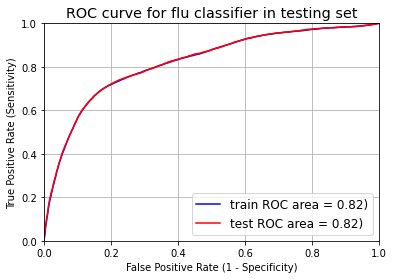

In [32]:
from utils.visualize import visualize
yhat_probs_train = model_best.predict(train_x, verbose=0)
yhat_probs_test = model_best.predict(test_x, verbose=0)
print(yhat_probs_test.shape)
yhat_classes_train,yhat_classes_test=visualize(yhat_probs_train,yhat_probs_test,model_best,train_x,train_y,test_x,test_y)

In [33]:
# df = pd.DataFrame([1, 23, 3, 5, 2])
# df.T

In [34]:
df1 = r0.T

In [35]:
df1.columns = ['Train accuracy', 'valid accuracy','Train AUC' ,'Valid AUC' ]

In [36]:
df1

,Train accuracy,valid accuracy,Train AUC,Valid AUC
0,0.878921,0.87942,0.820164,0.820983


In [38]:
import numpy as np

In [39]:
predict_train=model_best.predict(train_x) 
classes_train_pred=np.argmax(predict_train,axis=1)
classes_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
predict_test=model_best.predict(test_x) 
classes_test_pred=np.argmax(predict_test,axis=1)
classes_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
train_y = pd.DataFrame(train_y)
classes_train_pred = pd.DataFrame(classes_train_pred)
yhat_probs_train = pd.DataFrame(yhat_probs_train)

In [42]:
train_result= pd.concat([train_y, classes_train_pred,yhat_probs_train], axis=1)
train_result

,si1m,0,0
0,1,0,0.309914
1,1,0,0.332529
2,1,0,0.324410
3,1,0,0.357666
4,1,0,0.278777
...,...,...,...
173436,0,0,0.146285
173437,0,0,0.121995
173438,0,0,0.112169
173439,0,0,0.111108


In [43]:
train_result.columns =  ['sofa3m', 'class_pred', 'prob_pred']

In [44]:
train_result.to_csv('dnn for si over 1 in mimic train result ver2 20230223.csv')

In [45]:
test_y = pd.DataFrame(test_y)
classes_test_pred = pd.DataFrame(classes_test_pred)
yhat_probs_test = pd.DataFrame(yhat_probs_test)

In [46]:
test_result= pd.concat([classes_test_pred, classes_test_pred,yhat_probs_test], axis=1)
test_result

,0,0,0
0,0,0,0.441863
1,0,0,0.455183
2,0,0,0.567810
3,0,0,0.447865
4,0,0,0.329339
...,...,...,...
57807,0,0,0.137691
57808,0,0,0.173248
57809,0,0,0.199279
57810,0,0,0.300640


In [47]:
test_result.columns =  ['sofa3m', 'class_pred', 'prob_pred']

In [48]:
test_result.to_csv('dnn for si over 1 in mimic test result ver2 20230223.csv')